In [1]:
import numpy as np
import os
from PIL import Image
import h5py
import matplotlib.pyplot as plt

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [4]:
pwd

'/Users/malavikavijayendravasist/Desktop/mt2'

In [5]:
##resizing the images and storing them aside

# for path, subdirs, images in os.walk('/Users/malavikavijayendravasist/Desktop/mt2/paraview/images_paraview/'):
#     #print(path, subdirs, images)
#     for i, name in enumerate(images):
#         if name.endswith('.jpg'): 
#             print(name)
#             img_path = os.path.join(path,name)
#             image = Image.open(img_path)
#             image.thumbnail((224, 224), Image.ANTIALIAS)
#             image.save('/Users/malavikavijayendravasist/Desktop/mt2/paraview/images_paraview_/'+name, 'JPEG', quality=88)
#             ip = list(Image.open('/Users/malavikavijayendravasist/Desktop/mt2/paraview/images_paraview_/'+name).getdata())
#             print(np.shape(ip))

In [6]:
X =[]#np.array([])#, dtype=np.int64).reshape(50176, 3)
y = np.array([])
redshift=[]
merger=[]


for path, subdirs, images in os.walk('/Users/malavikavijayendravasist/Desktop/mt2/paraview/images_paraview_/'):
    #print(path, subdirs, images)
    for i, name in enumerate(images):
        if name.endswith('.jpg'): 
            img_path = os.path.join(path,name)
            img_pixels = np.array(Image.open(img_path).getdata())
#             img_pixels=Image.open(img_path).load()
#             print(img_pixels)
            #print(np.shape(X),np.shape(img_pixels))
            #print(type(X))
#             print('X size',X.size)
            #print(np.shape(img_pixels.T[0]))
            imgp=img_pixels.T[0]
            #print(type(np.array(img_pixels)))
            #print(img_pixels)
            #X = np.vstack((X, np.array(img_pixels))) if len(X) else img_pixels
            #X = np.vstack((X, np.array(img_pixels))) if len(X) else img_pixels
            #print(np.shape(img_pixels))
            #X.append(imgp)------------------------------------------------------->
            X.append(img_pixels)
            #print(np.shape(X))
#         y.append(correct_cat)
            redshift.append(int(images[i].split('_')[1]))
            merger.append(int(images[i].split('_')[2]))
            #print(i,name)
            #print(redshift,merger)
            f= h5py.File('/Users/malavikavijayendravasist/Desktop/mt2/mergers_identified/mergers_'+str(int(images[i].split('_')[1]))+'.hdf5', 'r')
            y=list(np.append(y,f.get('Size Ratio').value[int(images[i].split('_')[2])]))
            

In [7]:
print(np.shape(X))
print(np.shape(y))

X=np.array(X)
y=np.array(y)

(75, 50176, 3)
(75,)


In [8]:
XX=X.reshape((75,224,224,3))
print(np.shape(XX))

(75, 224, 224, 3)


In [9]:
# T=X.reshape((75,50176,3))
# np.shape(T)

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)#, random_state=seed)
XX_train, XX_test, y_train, y_test = train_test_split(XX, y, test_size=0.33)#, random_state=seed)

In [11]:

y_train

array([0.88047663, 0.32680118, 1.05990523, 0.61033982, 0.19914846,
       0.6392655 , 0.53283158, 0.17934464, 0.59520597, 0.571849  ,
       0.305772  , 0.61934597, 0.59024828, 0.65504011, 0.41391503,
       0.53893969, 0.20804634, 0.5222741 , 0.49281843, 0.69722033,
       0.75722101, 0.99468476, 0.53407586, 0.66680336, 0.37638288,
       0.88294533, 0.41251817, 0.80306365, 0.74793688, 0.57137843,
       0.72543896, 0.22515579, 0.28028883, 0.12159897, 0.19011194,
       0.36060814, 0.49499647, 0.65332451, 0.53370325, 0.48466863,
       0.34709067, 0.298391  , 0.117338  , 0.57904105, 0.29881905,
       0.33881938, 0.53247009, 0.40617602, 0.40494184, 0.31942052])

In [14]:
# X_train=np.array(X_train)
# y_train=np.array(y_train)
# X_test=np.array(X_test)
# y_test=np.array(y_test)

XX_train=np.array(XX_train)
y_train=np.array(y_train)
XX_test=np.array(XX_test)
y_test=np.array(y_test)

In [15]:
np.shape(XX_test)

(25, 224, 224, 3)

In [16]:
# lm = linear_model.LinearRegression()
# model = lm.fit(X_train, y_train)
# predictions = lm.predict(X_test)

In [17]:
# plt.scatter(y_test,predictions)

In [18]:
import tensorflow
from tensorflow.python.keras import layers 
from tensorflow.python.keras.losses import categorical_crossentropy
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.python.keras import backend
from tensorflow.keras.models import load_model
from keras.utils import CustomObjectScope
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint
from keras.metrics import top_k_categorical_accuracy

In [19]:

# dataset = np.loadtxt("/Users/malavikavijayendravasist/Desktop/pima-indians-diabetes.data.csv", delimiter=",")
# xx = dataset[:,0:8]
# yy = dataset[:,8]

# print(np.shape(xx))
# print(np.shape(yy))

# print(np.shape(X_train))
# print(np.shape(y_train))

# print(type(xx))
# print(type(X_train))

In [20]:

# X_test=np.array(X_test)
# y_test=np.array(y_test)
Y_train=np.array([])
Y_test=np.array([])

cl=[0,0.25,0.5,0.75,1.0,1.25]

Y_train_ohe = np.zeros((len(y_train), 5), dtype=np.int)
Y_test_ohe= np.zeros((len(y_test), 5), dtype=np.int)

for i in np.arange(len(y_train)):
    for j in np.arange(1,len(cl)):
        if y_train[i]> cl[j-1] and  y_train[i]< cl[j]: 
            Y_train=np.append(Y_train,cl[j])
            Y_train_ohe[i, j-1] = 1

for i in np.arange(len(y_test)):
    for j in np.arange(1,len(cl)):
        if y_test[i]> cl[j-1] and  y_test[i]< cl[j]: 
            Y_test=np.append(Y_test,cl[j])
            Y_test_ohe[i, j-1] = 1
    


In [21]:
Y_train,Y_test, Y_train_ohe, Y_test_ohe

(array([1.  , 0.5 , 1.25, 0.75, 0.25, 0.75, 0.75, 0.25, 0.75, 0.75, 0.5 ,
        0.75, 0.75, 0.75, 0.5 , 0.75, 0.25, 0.75, 0.5 , 0.75, 1.  , 1.  ,
        0.75, 0.75, 0.5 , 1.  , 0.5 , 1.  , 0.75, 0.75, 0.75, 0.25, 0.5 ,
        0.25, 0.25, 0.5 , 0.5 , 0.75, 0.75, 0.5 , 0.5 , 0.5 , 0.25, 0.75,
        0.5 , 0.5 , 0.75, 0.5 , 0.5 , 0.5 ]),
 array([0.75, 0.5 , 0.5 , 0.5 , 0.5 , 0.75, 0.75, 0.75, 0.75, 0.75, 0.5 ,
        0.5 , 0.5 , 0.5 , 0.5 , 0.75, 1.  , 0.75, 0.25, 0.75, 0.75, 0.75,
        0.5 , 0.75, 0.5 ]),
 array([[0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
       

In [22]:
# np.histogram(y_train,bins=4)



In [23]:
# print(to_categorical(Y_train, num_classes = 4, dtype = "float32"))
#Y_test=to_categorical(Y_test, num_classes = 4, dtype = "float32")

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from tensorflow.keras import layers,models
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.utils import to_categorical


# # print(np.shape(Y_train))
# model = Sequential()
# model.add(Dense(32, input_dim=50176, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='sigmoid'))


# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X_train, Y_train, epochs=5, batch_size=3)

# model.fit(xx, yy, epochs=150, batch_size=3)

############################################################################################################################


def mnist(): 
    
    def mnistmodel(inputs): 

        """
        Creates and returns neural net model
        """

        x = layers.Conv2D(32, kernel_size=(3, 3), 
                          activation='relu',
                          padding='valid',
                          data_format=backend.image_data_format(),
                          input_shape=(224,224,3))(inputs)
        x = layers.Dropout(0.5)(x)
        x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu',padding='valid')(x)
        x = layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2))(x)
        x = layers.Dropout(0.5)(x)
        x = layers.Flatten()(x)
        x = layers.Dense(128, activation='relu')(x)
        x = layers.Dropout(0.5)(x)
        #x = layers.Dense(self.nclasses, activation='sigmoid')(x)
        x = layers.Dense(5, activation='softmax')(x)
        return x

    model_input = layers.Input(shape=(224,224,3))
    model_output = mnistmodel(model_input)
    model = Model(inputs=model_input, outputs=model_output)
    return model

def resnet50():
    model_input = layers.Input(shape=(224,224,3))
    model = ResNet50(input_tensor=model_input, include_top=True,weights='imagenet')
    last_layer = model.get_layer('avg_pool').output
    x= layers.Flatten(name='flatten')(last_layer)
    out = layers.Dense(5, activation='softmax', name='output_layer')(x)
    custom_resnet_model = Model(inputs=model_input,outputs= out)

    for layer in custom_resnet_model.layers[:-1]:
        layer.trainable = False

    custom_resnet_model.layers[-1].trainable
    return custom_resnet_model
            
model= resnet50()
#model= mnist()

sgd=optimizers.SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(loss=categorical_crossentropy,optimizer=sgd,metrics=['accuracy'])

callbacks=[TensorBoard(log_dir='/Users/malavikavijayendravasist/Desktop/mt2/paraview/Tensorboard/TB_resnet50_'+str(100), batch_size=3), ModelCheckpoint('/Users/malavikavijayendravasist/Desktop/mt2/paraview/Model/M_resnet50_'+str(100),monitor='val_acc',verbose=1,period=1)]  #-{val_accuracy:.2f}

# construct the training image generator for data augmentation
aug = ImageDataGenerator(horizontal_flip=True)#, rotation_range=20, zoom_range=0.15,
#width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, fill_mode="nearest")
 
# train the network

H = model.fit_generator(aug.flow(XX_train, Y_train_ohe, batch_size=3),
validation_data=aug.flow(XX_test, Y_test_ohe), steps_per_epoch=len(XX_train) // 3,
epochs=100,callbacks=callbacks)





Epoch 1/100
15/16 [===========================>..] - ETA: 1s - loss: 2.5699 - acc: 0.4111

In [32]:
pwd

'/Users/malavikavijayendravasist/Desktop/mt2'

0.5
0.5
0.25


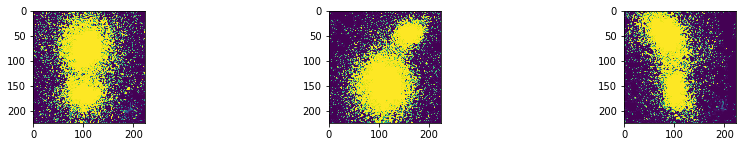

0.75
0.25
0.25


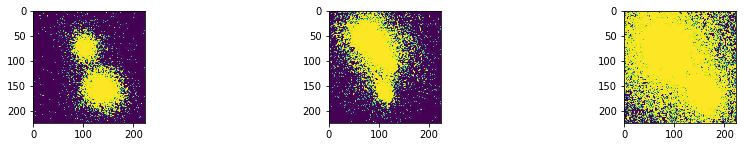

0.25
0.25
0.75


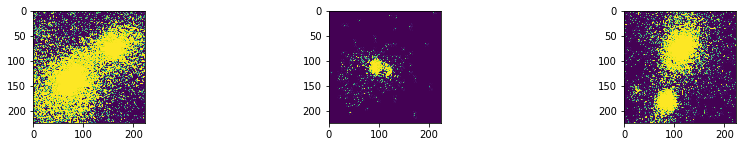

1.0
0.5
1.0


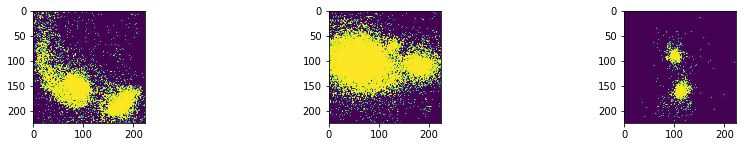

0.5
0.75
0.5


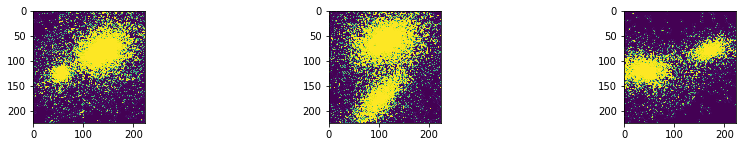

0.75
0.5
0.5


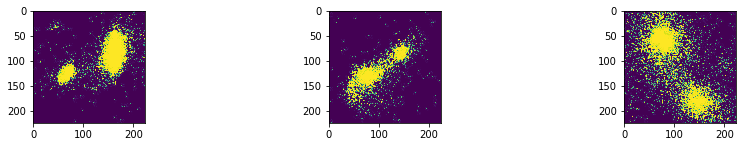

0.75
0.75
0.75


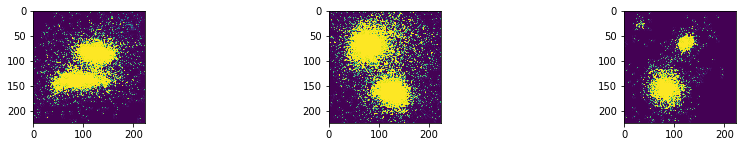

0.5
0.75
0.5


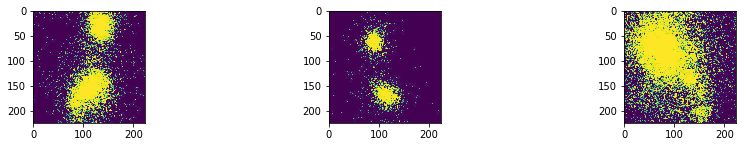

0.75
0.75
1.0


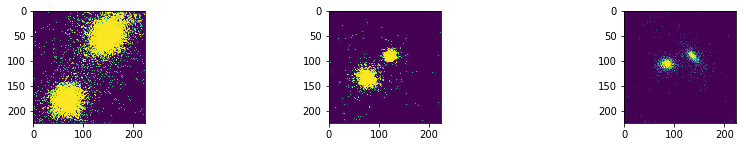

0.75
1.0
0.5


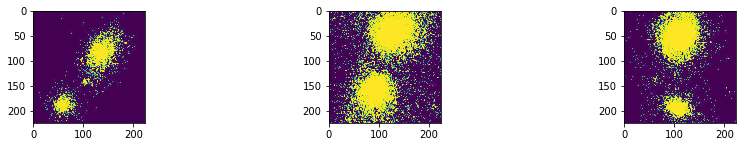

1.25
1.0
0.75


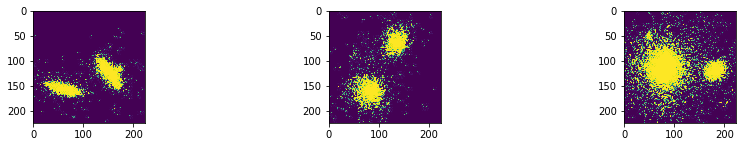

0.5
0.75
0.75


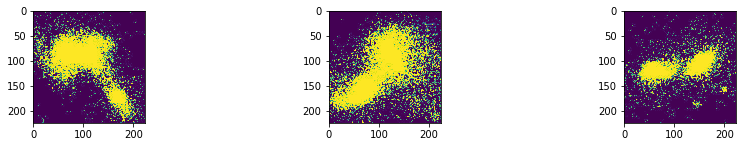

0.5
0.5
0.75


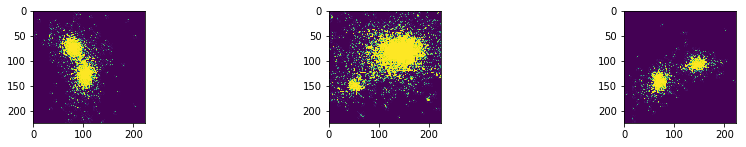

0.75
0.75
0.5


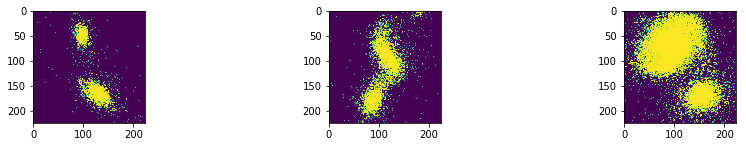

0.25
0.75
0.75


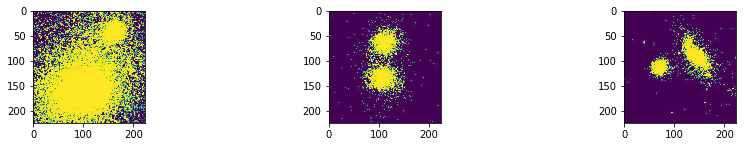

0.5
0.5
0.75


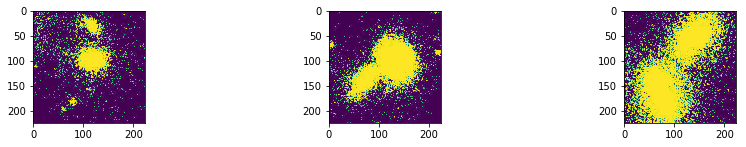

0.25
0.5


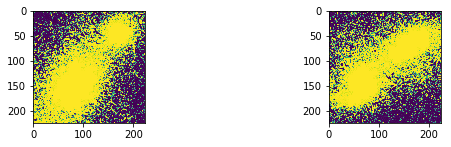

In [25]:

# for x,y in aug.flow(XX_test, Y_test,batch_size=3): 
for x,y in aug.flow(XX_train, Y_train_ohe,batch_size=3): 
    fig=plt.figure(figsize=(15,7))
    for i in range(0, len(x)):
        plt.subplot(330 + 1 + i)
#         if x[i] : 
        Tx=x[i].T[0]
        print(cl[np.nonzero(y[i])[0][0]+1])
        plt.imshow(Tx)
    plt.show()
    if len(x)==2: 
        break
    

In [26]:
# model.predict(X_test,batch_size=3)

In [27]:
xs = [[1,2,3,4,5],
    [10,20,30,40,50]]
zs = [10,20,30,40,50]
print(type(zs))
#ys = np.array([], dtype=np.int64).reshape(0,5)
ys=[]

print(ys)


X=[xs,zs]
for i in [0,1]: 
    
    ys.append(X[i])

ys=np.array(ys)

<class 'list'>
[]


In [28]:
print(np.shape(ys))
print(ys[0])
print(type(ys))

(2,)
[[1, 2, 3, 4, 5], [10, 20, 30, 40, 50]]
<class 'numpy.ndarray'>
